## Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [ ]:
train_data = pd.read_csv('fraudTrain.csv')

In [ ]:
pd.set_option('display.max_columns', None)

## Data Understanding

In [ ]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## Preprocessing Data

In [ ]:
#variable identifier: cc_num, first, last, unnamed (should be dropped)
#categorical field: category, city, merchant, gender, state, job, unix_time,street (unique value > 20 will be dropped or it will reclustered if the unique is too big)
#numerical: amt, zip, city_pop (it can be transform using normal distribution or scaling)
#location: lat, long, merch_lat, merch_long (create new feature that is distance between live location and transaction location)
#datetime: trans_date_trans_time, dob (create new feature to know the age of customer, transaction time can be clustered again)


In [ ]:
identifier = ["cc_num", "first", "last", "Unnamed: 0", "trans_num"]
category = ["category", "city", "merchant", "gender", "state", "job", "unix_time","street","zip"]
numerical = [ "amt", "city_pop"]
location = ["lat", "long", "merch_lat", "merch_long"]
datetime = ["trans_date_trans_time", "dob"]

In [ ]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
for i in train_data[category].columns:
  print(i, train_data[i].nunique())


category 14
city 894
merchant 693
gender 2
state 51
job 494
unix_time 1274823
street 983
zip 970


In [ ]:
train_data.drop(columns=["city", "merchant", "state", "job", "street", "unix_time","zip"], inplace= True)

In [ ]:
train_data.drop(columns=identifier, inplace=True)

In [ ]:
train_data.isnull().sum()

,0
trans_date_trans_time,0
category,0
amt,0
gender,0
lat,0
long,0
city_pop,0
dob,0
merch_lat,0
merch_long,0


In [ ]:
import math

def haversine_distance(lat1, lon1, lat2, lon2):
  """
  Calculate the great circle distance between two points
  on the earth (specified in decimal degrees)
  """
  # convert decimal degrees to radians
  lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

  # haversine formula
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
  c = 2 * math.asin(math.sqrt(a))
  # Radius of earth in kilometers. Use 3956 for miles.
  r = 6371
  # calculate the result
  return c * r

# Calculate the distance and add it as a new column
train_data['distance'] = train_data.apply(lambda row: haversine_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

In [ ]:
train_data['distance']

,distance
0,78.597568
1,30.212176
2,108.206083
3,95.673231
4,77.556744
...,...
1296670,119.752136
1296671,75.104085
1296672,99.047734
1296673,84.627652


In [ ]:
train_data.drop(columns=location, inplace=True)

In [ ]:
train_data.columns

Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'city_pop', 'dob',
       'is_fraud', 'distance'],
      dtype='object')

In [ ]:
# Convert the date columns to datetime objects
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['dob'] = pd.to_datetime(train_data['dob'])

# Calculate the age in years
train_data['age'] = ((train_data['trans_date_trans_time'] - train_data['dob']).dt.days / 365.25).astype(int)

# Drop the original date columns
train_data.drop(['dob'], axis=1, inplace=True)


In [ ]:
train_data['age']

,age
0,30
1,40
2,56
3,51
4,32
...,...
1296670,58
1296671,40
1296672,52
1296673,39


In [ ]:
# Extract hour and day from the datetime column
train_data['hour'] = train_data['trans_date_trans_time'].dt.hour
train_data['day'] = train_data['trans_date_trans_time'].dt.dayofweek  # Monday=0, Sunday=6

# Drop the original datetime column
train_data.drop(['trans_date_trans_time'], axis=1, inplace=True)

In [ ]:
train_data['hour'].value_counts()

,count
hour,
23,67104
22,66982
18,66051
16,65726
21,65533
19,65508
17,65450
15,65391
13,65314


In [ ]:
train_data['day'].value_counts()

,count
day,
0,254282
6,250579
5,200957
1,160227
4,152272
3,147285
2,131073


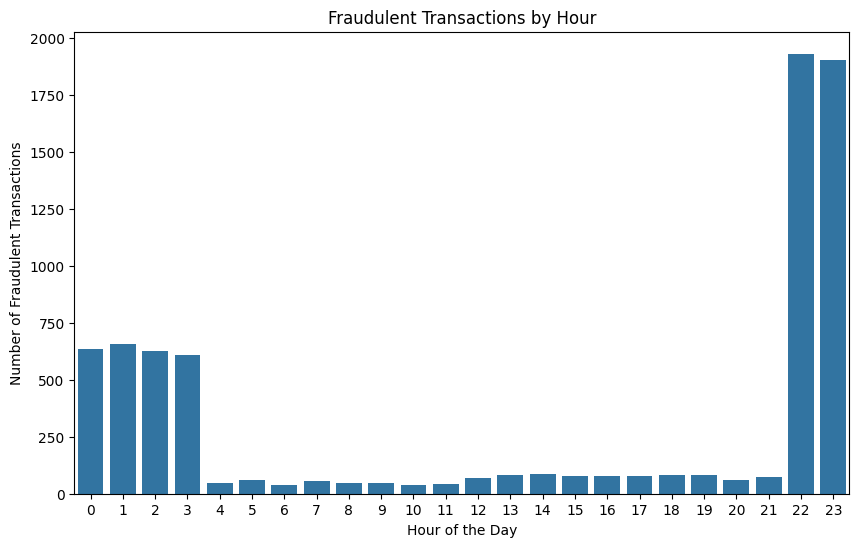

In [ ]:

# Filter data where is_fraud is 1
fraud_data = train_data[train_data['is_fraud'] == 1]

# Create a countplot of the 'hour' column for fraudulent transactions
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=fraud_data)
plt.title('Fraudulent Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


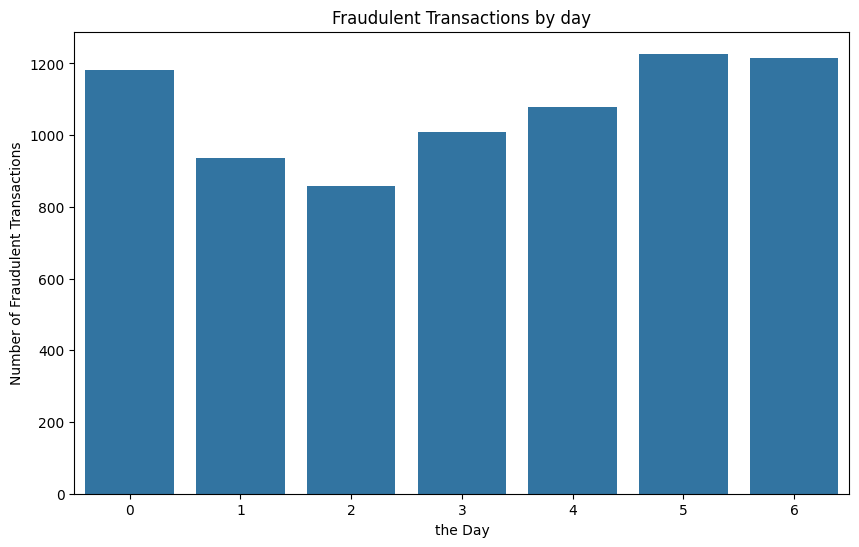

In [ ]:
# Filter data where is_fraud is 1
fraud_data = train_data[train_data['is_fraud'] == 1]

# Create a countplot of the 'hour' column for fraudulent transactions
plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=fraud_data)
plt.title('Fraudulent Transactions by day')
plt.xlabel('the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


In [ ]:
train_data['category_time'] = np.where(train_data['hour'].isin([22, 23, 0, 1, 2, 3]), 'risky_time', 'normal_time')


In [ ]:
train_data['category_day'] = np.where(train_data['day'].isin([0, 5, 6]), 'risky_day', 'normal_day')

In [ ]:
train_data['category_time']

,category_time
0,risky_time
1,risky_time
2,risky_time
3,risky_time
4,risky_time
...,...
1296670,normal_time
1296671,normal_time
1296672,normal_time
1296673,normal_time


In [ ]:
train_data['category_day']

,category_day
0,normal_day
1,normal_day
2,normal_day
3,normal_day
4,normal_day
...,...
1296670,risky_day
1296671,risky_day
1296672,risky_day
1296673,risky_day


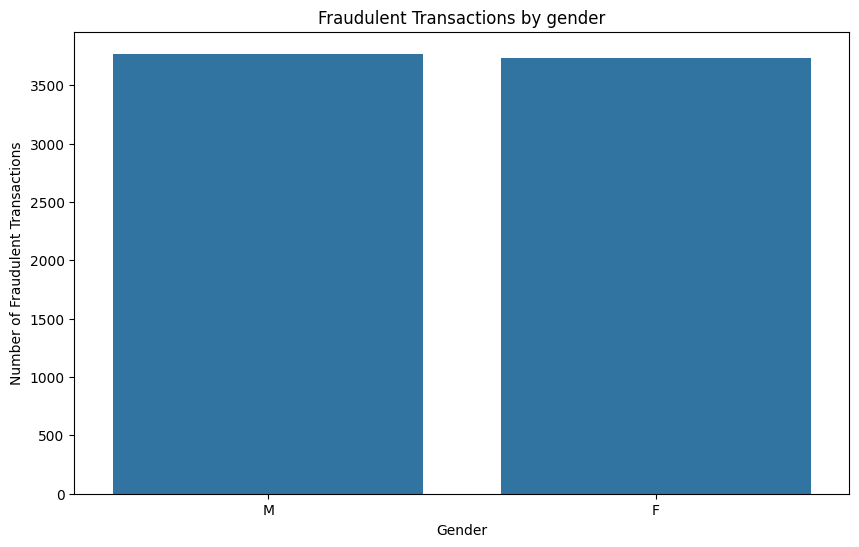

In [ ]:
# Filter data where is_fraud is 1
fraud_data = train_data[train_data['is_fraud'] == 1]

# Create a countplot of the gender column for fraudulent transactions
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=fraud_data)
plt.title('Fraudulent Transactions by gender')
plt.xlabel('Gender')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

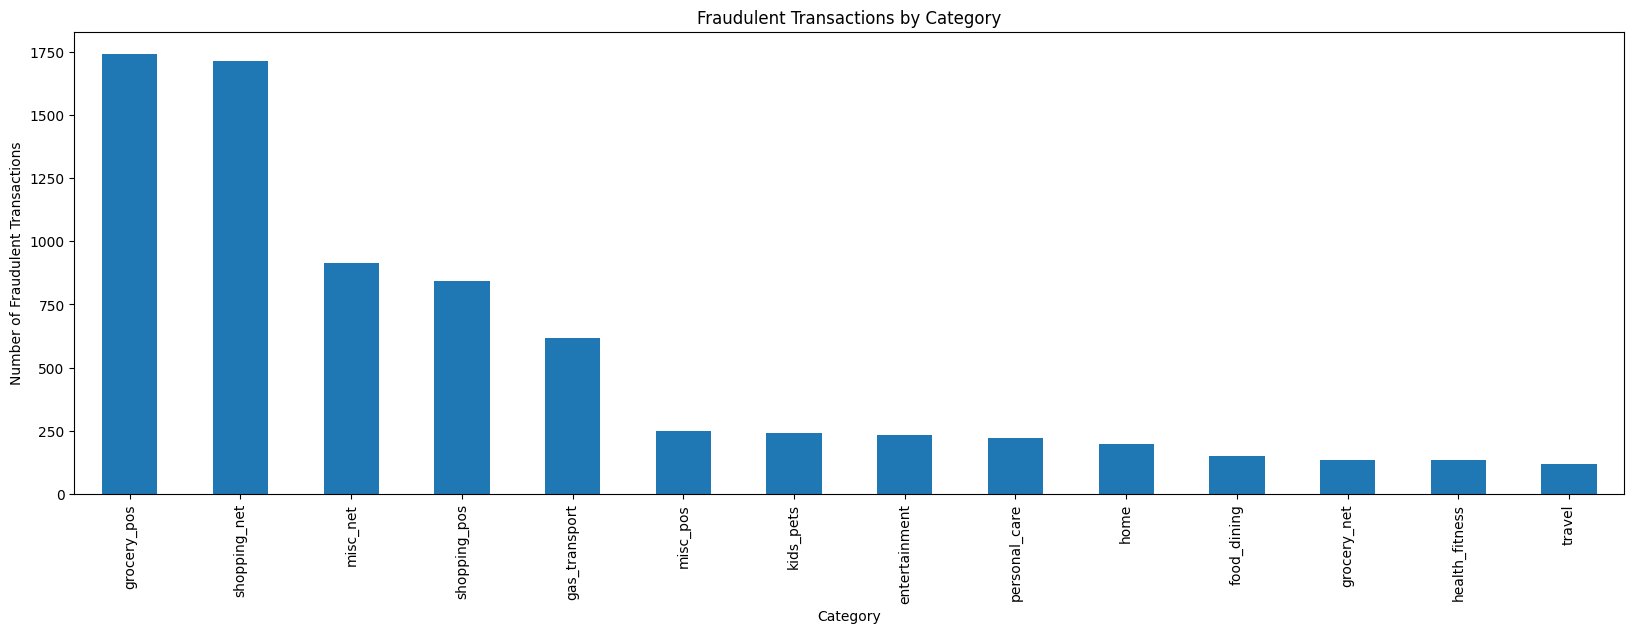

In [ ]:
# Filter data where is_fraud is 1
fraud_data = train_data[train_data['is_fraud'] == 1]

# Group by 'category' and count the occurrences
category_counts = fraud_data['category'].value_counts()

# Create a bar chart
plt.figure(figsize=(20, 6))
category_counts.plot(kind='bar')
plt.title('Fraudulent Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


In [ ]:
# Get the top 5 categories with the highest number of fraudulent transactions
top_5_categories = fraud_data['category'].value_counts().nlargest(5).index

# Create a new column 'risky_category'
train_data['risky_category'] = np.where(train_data['category'].isin(top_5_categories), 'risky_category', 'normal_category')


In [ ]:
train_data['risky_category']

,risky_category
0,risky_category
1,risky_category
2,normal_category
3,risky_category
4,normal_category
...,...
1296670,normal_category
1296671,normal_category
1296672,normal_category
1296673,normal_category


fraud transcation by gender is almost the same so we can ignore to categorize new feature

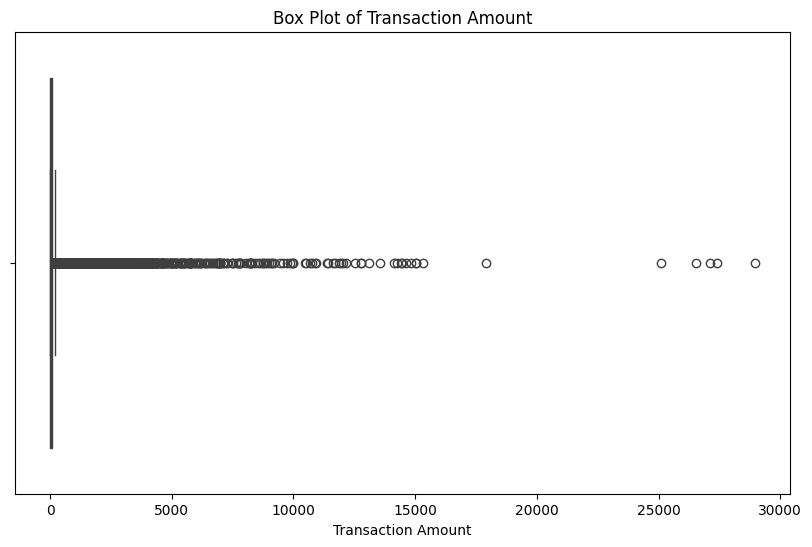

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='amt', data=train_data)
plt.title('Box Plot of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.show()


In [ ]:
train_data['amt'].describe()

,amt
count,1.296675e+06
mean,7.035104e+01
std,1.603160e+02
min,1.000000e+00
25%,9.650000e+00
50%,4.752000e+01
75%,8.314000e+01
max,2.894890e+04


create amt to distribution normal and recategorize


In [ ]:
train_data.head()

,category,amt,gender,city_pop,is_fraud,distance,age,hour,day,category_time,category_day,risky_category
0,misc_net,4.97,F,3495,0,78.597568,30,0,1,risky_time,normal_day,risky_category
1,grocery_pos,107.23,F,149,0,30.212176,40,0,1,risky_time,normal_day,risky_category
2,entertainment,220.11,M,4154,0,108.206083,56,0,1,risky_time,normal_day,normal_category
3,gas_transport,45.00,M,1939,0,95.673231,51,0,1,risky_time,normal_day,risky_category
4,misc_pos,41.96,M,99,0,77.556744,32,0,1,risky_time,normal_day,normal_category


In [ ]:
# OHE for categorical data
final_data = pd.get_dummies(data=train_data, columns=['category', 'gender', 'category_time', 'category_day', 'risky_category'])

In [ ]:
final_data

,amt,city_pop,is_fraud,distance,age,hour,day,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,category_time_normal_time,category_time_risky_time,category_day_normal_day,category_day_risky_day,risky_category_normal_category,risky_category_risky_category
0,4.97,3495,0,78.597568,30,0,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,True,False,False,True
1,107.23,149,0,30.212176,40,0,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,True
2,220.11,4154,0,108.206083,56,0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True,False
3,45.00,1939,0,95.673231,51,0,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True
4,41.96,99,0,77.556744,32,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,258,0,119.752136,58,12,6,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False
1296671,51.70,100,0,75.104085,40,12,6,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False
1296672,105.93,899,0,99.047734,52,12,6,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False
1296673,74.90,1126,0,84.627652,39,12,6,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False


## Data Modelling

### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Separate features and target variable
X = final_data.drop('is_fraud', axis=1)
y = final_data['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

label = ['not fraud', 'fraud']

# Evaluate Logistic Regression
print("Logistic Regression Metrics:")
print(classification_report(y_test,y_pred_logreg,target_names=label))

Logistic Regression Metrics:
              precision    recall  f1-score   support

   not fraud       0.99      1.00      1.00    257815
       fraud       0.01      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



### Random Forest

In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# Evaluate Random Forest
print("\nRandom Forest Metrics:")
print(classification_report(y_test,y_pred_rf,target_names=label))


Random Forest Metrics:
              precision    recall  f1-score   support

   not fraud       1.00      1.00      1.00    257815
       fraud       0.97      0.78      0.87      1520

    accuracy                           1.00    259335
   macro avg       0.98      0.89      0.93    259335
weighted avg       1.00      1.00      1.00    259335



### XGBoost

In [ ]:
!pip install xgboost

from xgboost import XGBClassifier

# XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate XGBoost
print("\nXGBoost Metrics:")
print(classification_report(y_test, y_pred_xgb, target_names=label))



XGBoost Metrics:
              precision    recall  f1-score   support

   not fraud       1.00      1.00      1.00    257815
       fraud       0.96      0.84      0.90      1520

    accuracy                           1.00    259335
   macro avg       0.98      0.92      0.95    259335
weighted avg       1.00      1.00      1.00    259335



## Metrics Evaluation

Confusion Matrix:
[[257673    142]
 [  1519      1]]


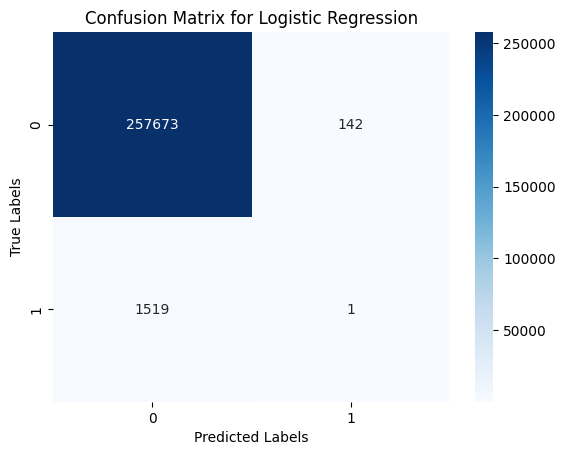

In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

Confusion Matrix:
[[257777     38]
 [   327   1193]]


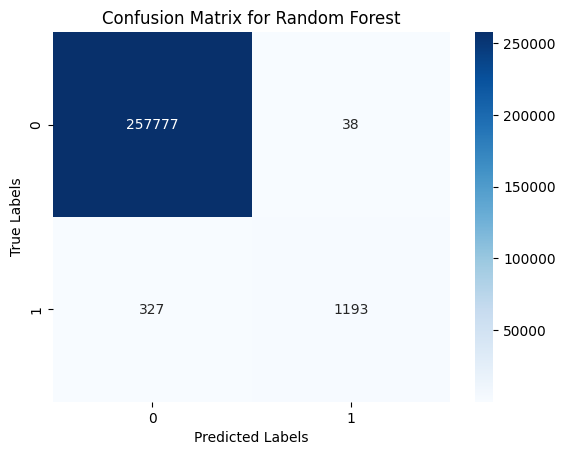

In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest")
plt.show()

Confusion Matrix:
[[257755     60]
 [   238   1282]]


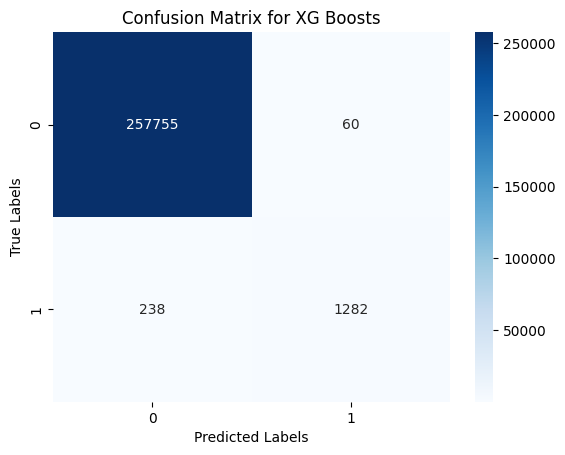

In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for XG Boosts")
plt.show()

## XGBoost HyperTuning

In [ ]:
# XGBoost HyperTuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

# Create an XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Get the best model
best_xgb = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate the best model
print("\nBest XGBoost Metrics:")
print(classification_report(y_test, y_pred_best_xgb, target_names=label))


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}

Best XGBoost Metrics:
              precision    recall  f1-score   support

   not fraud       1.00      1.00      1.00    257815
       fraud       0.96      0.82      0.89      1520

    accuracy                           1.00    259335
   macro avg       0.98      0.91      0.94    259335
weighted avg       1.00      1.00      1.00    259335



Confusion Matrix:
[[257766     49]
 [   266   1254]]


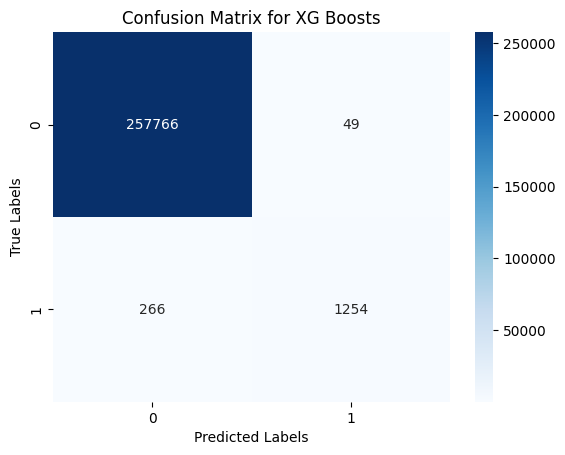

In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best_xgb)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for XG Boosts")
plt.show()